<a href="https://colab.research.google.com/github/yul77/hmkd1-2023/blob/main/pt1__%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 파이토치 튜토리얼
https://tutorials.pytorch.kr/

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치의 주요 특징

- 동적 계산 그래프(Dynamic Computational Graph): 파이토치는 계산 그래프를 생성하고 수정할 수 있는 동적 계산 그래프를 사용. 이는 모델의 복잡한 흐름과 제어 흐름을 쉽게 구현할 수 있도록 도와준다. 이러한 특징은 딥러닝 모델의 구성과 실험 과정에서 유연성을 제공.

- 자동 미분(Automatic Differentiation): 파이토치는 자동 미분 기능을 제공하여 계산 그래프 상에서의 역전파(Backpropagation)를 자동으로 처리. 이를 통해 모델의 가중치 업데이트를 간편하게 수행.

- 쉬운 인터페이스: 파이토치는 직관적이고 쉬운 인터페이스를 제공. PyTorch는 Pythonic한 구문과 함께 다양한 딥러닝 모델을 구성하고 학습시키는 데에 필요한 다양한 기능을 제공.

- GPU 지원: 파이토치는 GPU를 활용하여 딥러닝 모델의 학습과 추론을 가속화할 수 있다. GPU를 사용하면 대용량 데이터와 복잡한 모델에 대한 연산을 더욱 빠르게 처리.

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

Saving 다운로드 (1).png to 다운로드 (1).png
Uploaded file: 다운로드 (1).png


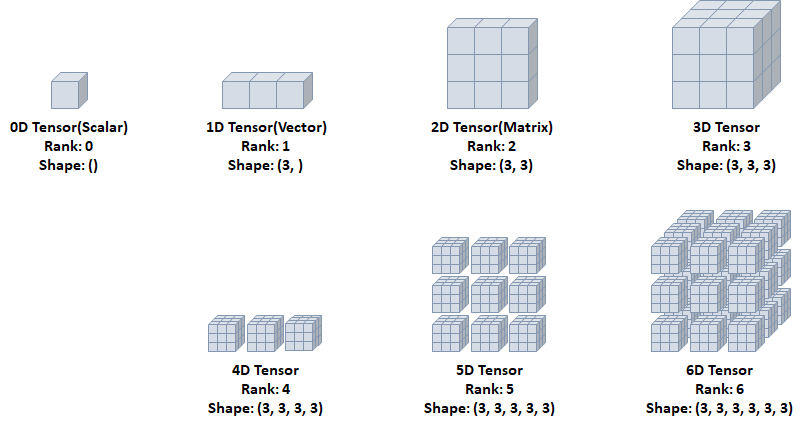

In [82]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    display(Image(filename))

In [1]:
import torch
torch.__version__

'2.0.1+cu118'

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [2]:
x = torch.empty(4,2) # 텐서를 초기화 하지 않고, 현재 메모리에 남아있는 임의의 값으로 채움.
print(x)

tensor([[ 1.3621e+11,  2.1451e-18],
        [ 3.0806e-34,  4.3496e-41],
        [ 1.3655e-38,  0.0000e+00],
        [-1.2007e-04, -1.7797e+21]])


In [3]:
import numpy as np
x = np.empty([4,2]) # 지정된 크기과 배열을 생성하지만 초기화되지 않아 배열 요소에는 이전에 할당된 메모리에 저장된 임의의 값이 들어감.
print(x)

# 안의 숫자는 중요하지 않고 지정된 크기의 텐서만 지정되고 메모리에 남아있는 임의의 수가 표시되는 것

[[7.20314827e-316 0.00000000e+000]
 [2.88980630e+204 6.01099964e+175]
 [2.04911928e+214 3.17095864e+180]
 [1.42553124e+248 6.58670517e-310]]


무작위로 초기화 된 텐서

In [4]:
x = torch.rand(4,2) # 4행2열짜리  0~1사이의 균등한 숫자(rand)를 무작위로 뽑아준다.
print(x)

tensor([[0.1365, 0.7371],
        [0.7925, 0.6245],
        [0.7062, 0.3937],
        [0.8823, 0.8485]])


### PyTorch는 데이터 타입

1. torch.float32 또는 torch.float: 32비트 부동 소수점 숫자를 나타냅니다. 기본적으로 사용되는 데이터 타입입니다.

2. torch.float64 또는 torch.double: 64비트 부동 소수점 숫자를 나타냅니다. 더 정확한 숫자 계산이 필요한 경우에 사용될 수 있습니다.

3. torch.float16 또는 torch.half: 반 정밀도 16비트 부동 소수점 숫자를 나타냅니다. 메모리를 적게 사용하며, 계산 속도도 빠릅니다. 그러나 정확도가 상대적으로 낮을 수 있습니다.

4. torch.int8, torch.int16, torch.int32, torch.int64: 정수 데이터 타입입니다. 각각 8비트, 16비트, 32비트, 64비트 크기를 가집니다.

5. torch.uint8: 8비트 부호 없는 정수 데이터 타입입니다. 0과 255 사이의 값을 가질 수 있습니다.

6. torch.bool: 불리언 데이터 타입으로, True 또는 False 값을 가집니다.

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

데이터 타입(dtype)이 long이고 , 0으로 채워진 텐서

In [6]:
x  = torch.zeros(4,2, dtype = torch.long) #long = 64비트 정수
print(x) # 0으로 구성된 4행 2열을 만들건데 dtype을 64비트짜리 정수로 하겠다.

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [7]:
x =torch.tensor([3,2.3])
print(x)

tensor([3.0000, 2.3000])


2x4크기 더블타입, 1로 채워진 텐서

In [8]:
x = x.new_ones(2,4,dtype = torch.double)# double = 64비트 실수
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x 와 같은 크기, float 타입, 무작위로 채워진 텐서

In [9]:
x = torch.randn_like(x, dtype = torch.float) # float = 32비트 실수
print(x)

tensor([[ 0.9608, -0.3940, -0.4129, -0.8393],
        [ 1.3194,  0.5957, -0.7802, -0.4240]])


In [10]:
x = torch.randn(5) # 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
print(x) #표준 정규분포를 따르는 값 5개 출력

tensor([-1.2646, -1.4893, -0.5203,  0.6521,  0.8537])


텐서의 크기 계산

In [11]:
print(x.size())

torch.Size([5])


#### 데이터 타입(Data Type)

In [12]:
ft = torch.FloatTensor([1,2,3]) #FloatTensor() 이용해서 타입지정가능
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [16]:
print(ft.short()) # short = 16비트 정수
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [17]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [18]:
print(it.float())
print(it.double()) #64비트 실수
print(it.half()) #16비트 실수

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치(CPU, GPU)로도 옮길 수 있음

NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다'라고 발음한다. CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동

In [19]:
x = torch.randn(1)
print(x)
print(x.item()) #item = x에 있는 값을 꺼내는 것.
print(x.dtype)

tensor([1.0410])
1.0409693717956543
torch.float32


In [23]:
a = torch.randn(10000000)
print(a.mean())
print(a.std())

tensor(-0.0003)
tensor(1.0003)


In [24]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## 다차원 텐서 표현
#### 0D Tensor(Scalar)
- 하나의 숫자를 감도 있는 텐서(tensor)
- 축과 형상이 없음

In [78]:
t0 = torch.tensor(0)

print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [79]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

Saving 다운로드.png to 다운로드.png
Uploaded file: 다운로드.png


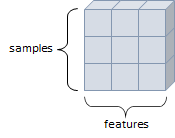

In [81]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    display(Image(filename))


In [83]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


[과제]3D, 4D, 5D 텐서를 생성하세요.

3D Tensor

- 큐브(cube)와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

Saving 다운로드.png to 다운로드 (2).png
Uploaded file: 다운로드 (2).png


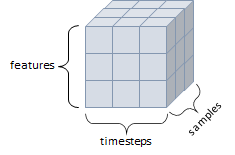

In [84]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    display(Image(filename))

4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례(흑백 이미지 데이터는 3D Tensor로 가능)
- 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

Saving 다운로드.png to 다운로드 (3).png
Uploaded file: 다운로드 (3).png


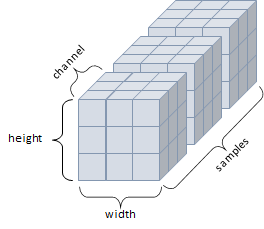

In [85]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    display(Image(filename))

5D Tensor
- 5개의 축
- 비디오 데이터가 대표적인 사례
- 주로 샘플(samples), 프레임(frames),높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)
- 텐서에 대한 수학 연산, 삼각함수, 비트연산, 비교연산, 집계 등 제공

In [28]:
# http://aigong.tistory.com/178

import math
a = torch.randn(1,2) * 2 - 1 # 가우시안 표준정규 분포

print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5,0.5))

# torch.clamp함수는 주어진 텐서의 각 원소를 주어진 범위 (min과 max)로 제한하는 함수
# 입력 값이 min < x(input) < max이면 x가 그대로 나오지만
# min보다 작으면 min값이 , max보다 크면 max값이 나오는 구조

tensor([[-0.8080,  1.4614]])
tensor([[0.8080, 1.4614]])
tensor([[-0., 2.]])
tensor([[-1.,  1.]])
tensor([[-0.5000,  0.5000]])


In [29]:
b = torch.randn(1,5) * 3 - 2
print(b)
print(torch.abs(b)) # 절대값
print(torch.ceil(b)) #천장에 있는 값
print(torch.floor(b)) #바닥에 있는 값
print(torch.clamp(b, -5, 5)) # b의 값 중에서 -5와 5 사이에 있는 값.

tensor([[-1.1432, -3.5803, -5.9626, -2.9477, -1.7258]])
tensor([[1.1432, 3.5803, 5.9626, 2.9477, 1.7258]])
tensor([[-1., -3., -5., -2., -1.]])
tensor([[-2., -4., -6., -3., -2.]])
tensor([[-1.1432, -3.5803, -5.0000, -2.9477, -1.7258]])


In [30]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a)) # 텐서 a의 모든 요소를 곱한 값을 출력
print(torch.unique(torch.tensor([1,2,3,1,2,1])))



tensor([[-0.8080,  1.4614]])
tensor(-0.8080)
tensor(1.4614)
tensor(0.3267)
tensor(1.6047)
tensor(-1.1808)
tensor([1, 2, 3])


max 와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax : 최대값을 가진 인덱스
- argmin : 최소값을 가진 인덱스

In [32]:
x = torch.rand(2,2) #균등분포
print(x,'\n')
print(x.max(dim=0),'\n') # 행방향으로 비교했을 때의 최대값
print(x.max(dim=1)) #열방향으로 비교했을 때의 최대값

tensor([[0.4182, 0.5994],
        [0.9840, 0.6195]]) 

torch.return_types.max(
values=tensor([0.9840, 0.6195]),
indices=tensor([1, 1])) 

torch.return_types.max(
values=tensor([0.5994, 0.9840]),
indices=tensor([1, 0]))


In [34]:
x = torch.rand(2,2)
print(x,'\n')
print(x.min(dim=0),'\n') # 행방향으로 비교했을 때의 최소값
print(x.min(dim=1)) #열방향으로 비교했을 때의 최소값

tensor([[0.1498, 0.3607],
        [0.9625, 0.6568]]) 

torch.return_types.min(
values=tensor([0.1498, 0.3607]),
indices=tensor([0, 0])) 

torch.return_types.min(
values=tensor([0.1498, 0.6568]),
indices=tensor([0, 1]))


In [86]:
 x = torch.rand(2,2)# 무작위로 생성된 행렬을 반환
 print(x)
 y = torch.rand(2,2)
 print(y)

tensor([[0.1303, 0.9025],
        [0.2066, 0.9095]])
tensor([[0.1426, 0.3463],
        [0.8463, 0.6549]])


torch.add = 덧셈

In [87]:
print(x+y,'\n')
print(torch.add(x,y))

tensor([[0.2729, 1.2489],
        [1.0529, 1.5644]]) 

tensor([[0.2729, 1.2489],
        [1.0529, 1.5644]])


결과 텐서를 인자로 제공

In [88]:
result = torch.empty(2,4)
torch.add(x,y, out = result)
print(result)

tensor([[0.2729, 1.2489],
        [1.0529, 1.5644]])


<ipython-input-88-211239dfa68e>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:26.)
  torch.add(x,y, out = result)


`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [89]:
print(x)
print(y)
print()
y.add_(x) # _가 있는 add_는 메서드가 y자체를 변경한다는 의미이며 y의 값이 변경
print(y)

tensor([[0.1303, 0.9025],
        [0.2066, 0.9095]])
tensor([[0.1426, 0.3463],
        [0.8463, 0.6549]])

tensor([[0.2729, 1.2489],
        [1.0529, 1.5644]])


torch.sub : 뺄셈

In [90]:
print(x,'\n')
print(y,'\n')
print(x-y,'\n')
x.sub_(y)
print(x,'\n')
print(torch.sub(x,y),'\n')
print(x.sub(y))


tensor([[0.1303, 0.9025],
        [0.2066, 0.9095]]) 

tensor([[0.2729, 1.2489],
        [1.0529, 1.5644]]) 

tensor([[-0.1426, -0.3463],
        [-0.8463, -0.6549]]) 

tensor([[-0.1426, -0.3463],
        [-0.8463, -0.6549]]) 

tensor([[-0.4154, -1.5952],
        [-1.8992, -2.2193]]) 

tensor([[-0.4154, -1.5952],
        [-1.8992, -2.2193]])


torch.mul : 곱셈

In [91]:
print(x,'\n')
print(y,'\n')
print(x*y,'\n')
x.mul_(y) # y를 x에 곱해서 업데이트
print(x,'\n')
print(torch.mul(x,y),'\n')
print(x.mul(y))

tensor([[-0.1426, -0.3463],
        [-0.8463, -0.6549]]) 

tensor([[0.2729, 1.2489],
        [1.0529, 1.5644]]) 

tensor([[-0.0389, -0.4325],
        [-0.8910, -1.0245]]) 

tensor([[-0.0389, -0.4325],
        [-0.8910, -1.0245]]) 

tensor([[-0.0106, -0.5402],
        [-0.9382, -1.6028]]) 

tensor([[-0.0106, -0.5402],
        [-0.9382, -1.6028]])


torch.div : 나눗셈

In [92]:
print(x,'\n')
print(y,'\n')
print(x/y,'\n')
x.div_(y) # y를 x에 곱해서 업데이트
print(x,'\n')
print(torch.div(x,y),'\n')
print(x.div(y))

tensor([[-0.0389, -0.4325],
        [-0.8910, -1.0245]]) 

tensor([[0.2729, 1.2489],
        [1.0529, 1.5644]]) 

tensor([[-0.1426, -0.3463],
        [-0.8463, -0.6549]]) 

tensor([[-0.1426, -0.3463],
        [-0.8463, -0.6549]]) 

tensor([[-0.5226, -0.2773],
        [-0.8037, -0.4186]]) 

tensor([[-0.5226, -0.2773],
        [-0.8037, -0.4186]])


torch.mm : 내적(dot product)

torch.svd(z)는 변수 z의 특이값 분해를 출력.
- 특이값 분해는 행렬을 세 개의 행렬로 분해하는 기법으로, A = UΣVT 형태로 분해. U, Σ, V는 각각 특이벡터(U), 대각행렬(Σ), 전치된 특이벡터(VT)

- 이 코드는 주어진 행렬 x와 y를 곱하고, 곱한 결과 행렬 z에 대해 특이값 분해를 수행하여 특이값, 특이벡터, 그리고 전치된 특이벡터를 출력. 특이값 분해는 다양한 응용 분야에서 사용되는 중요한 행렬 분해 기법.

In [93]:
print(x,'\n')
print(y,'\n')
print(torch.matmul(x,y),'\n')
z = torch.mm(x,y)
print(z,'\n')

print(torch.svd(z)) #singular value decomposition A = U sigma VT

tensor([[-0.1426, -0.3463],
        [-0.8463, -0.6549]]) 

tensor([[0.2729, 1.2489],
        [1.0529, 1.5644]]) 

tensor([[-0.4036, -0.7199],
        [-0.9204, -2.0814]]) 

tensor([[-0.4036, -0.7199],
        [-0.9204, -2.0814]]) 

torch.return_types.svd(
U=tensor([[-0.3399, -0.9405],
        [-0.9405,  0.3399]]),
S=tensor([2.4197, 0.0733]),
V=tensor([[ 0.4144,  0.9101],
        [ 0.9101, -0.4144]]))


## 텐서의 조작(Manipulations)
인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [97]:
import torch
x = torch.Tensor([[1,2],[3,4]])
print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])
print(x[:,0])
print(x[:,1])
print(x[0,:])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


https://bigdatadiary0819.tistory.com/60

º 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성

º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력

7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력

view: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [66]:
x = torch.randn(4,5)
print(x)
print()
y = x.view(20) # view()함수는 텐서의 크기를 결정
print(y)

z = x.view(5,-1)
print(z)

tensor([[ 6.2312e-01,  1.0573e-01,  1.0459e+00,  9.1470e-01, -8.6739e-01],
        [ 2.4217e-02,  9.3269e-01,  9.9667e-01,  4.3529e-01, -1.1528e+00],
        [ 1.1436e+00, -2.6266e+00, -3.4972e-01,  4.6171e-01, -1.1907e+00],
        [-9.9975e-04,  1.0857e+00, -5.3888e-02,  5.5639e-01, -8.6267e-02]])

tensor([ 6.2312e-01,  1.0573e-01,  1.0459e+00,  9.1470e-01, -8.6739e-01,
         2.4217e-02,  9.3269e-01,  9.9667e-01,  4.3529e-01, -1.1528e+00,
         1.1436e+00, -2.6266e+00, -3.4972e-01,  4.6171e-01, -1.1907e+00,
        -9.9975e-04,  1.0857e+00, -5.3888e-02,  5.5639e-01, -8.6267e-02])
tensor([[ 6.2312e-01,  1.0573e-01,  1.0459e+00,  9.1470e-01],
        [-8.6739e-01,  2.4217e-02,  9.3269e-01,  9.9667e-01],
        [ 4.3529e-01, -1.1528e+00,  1.1436e+00, -2.6266e+00],
        [-3.4972e-01,  4.6171e-01, -1.1907e+00, -9.9975e-04],
        [ 1.0857e+00, -5.3888e-02,  5.5639e-01, -8.6267e-02]])


In [62]:
import torch
x = torch.randn(4,5)
print(x)
print(x.shape)
print(x.size())

tensor([[-0.4326,  0.3468,  0.3168, -1.8861, -0.0935],
        [-0.9661,  0.5288, -0.6039,  0.4041,  0.4055],
        [-1.8000,  0.3203,  1.0386,  0.3891, -0.9815],
        [ 0.5076, -0.4037, -0.3280,  0.9431,  0.0255]])
torch.Size([4, 5])
torch.Size([4, 5])


item: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 잇음.
+ 스칼라 값이 하나만 존재해야 사용 가능

In [98]:
x = torch.randn(1)
print(x)
print(x.item()) # 텐서의 값을 파이썬의 숫자로 변환하며 텐서에서 값을 추출
print(x.dtype)

tensor([-0.3834])
-0.38342341780662537
torch.float32


squeesze : 차원을 축소(제거)

In [68]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.2492, 0.6255, 0.2896],
         [0.6661, 0.5473, 0.1868],
         [0.9380, 0.5207, 0.9642]]])
torch.Size([1, 3, 3])


In [69]:
t = tensor.squeeze()
print(t)
print(t.shape) #3 차원이 2차원으로 축소됨

tensor([[0.2492, 0.6255, 0.2896],
        [0.6661, 0.5473, 0.1868],
        [0.9380, 0.5207, 0.9642]])
torch.Size([3, 3])


unsqueeze : 차원을 증가(생성)

In [99]:
t = torch.rand(3,3)
print(t)
print(t.shape)


tensor([[0.7026, 0.6950, 0.8151],
        [0.7888, 0.6553, 0.2745],
        [0.7389, 0.5098, 0.0602]])
torch.Size([3, 3])


In [100]:

tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)
     # 3행 3열이 1개인 3차원

tensor([[[0.7026, 0.6950, 0.8151],
         [0.7888, 0.6553, 0.2745],
         [0.7389, 0.5098, 0.0602]]])
torch.Size([1, 3, 3])


tensor.unsqueeze(dim=2)

- unsqueeze 함수는 텐서에 새로운 차원을 추가. 여기서 dim=2는 새로운 차원이 추가될 위치를 나타내며 기존 텐서의 모든 차원의 인덱스를 증가시키고, 새로운 차원은 dim=2에 위치.

- 원래 텐서의 모양(shape)이 (3, 4)이었다면, unsqueeze(dim=2)를 적용한 후의 모양은 (3, 4, 1)이 됩니다. 따라서, 이 코드에서는 기존 텐서에 1차원을 추가

In [101]:
tensor.shape

torch.Size([1, 3, 3])

In [71]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape) # dim을 사용하여 차원을 늘릴 수 있음

tensor([[[0.2492],
         [0.6255],
         [0.2896]],

        [[0.6661],
         [0.5473],
         [0.1868]],

        [[0.9380],
         [0.5207],
         [0.9642]]])
torch.Size([3, 3, 1])


stack은 새로운 차원을 추가하여 텐서들을 결합하는 반면, cat은 기존 차원을 따라 텐서들을 연결

- stack : 새로운 차원이 추가되며, 해당 차원의 크기는 결합할 텐서들의 개수
- cat: 주어진 텐서들을 기존 차원을 따라 연결하여 결합

In [72]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])
print(torch.stack([x,y,z]))  # 차곡차곡 쌓여서 3행 2열이 된다.

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(concatenate)
- 주어진 텐서들을 기존 차원을 따라 연결하여 결합

In [73]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b),dim=0) #행방향으로 cat
print(c)
print(c.size()) # 3행 3열이 2개 생김.

tensor([[[-3.0882,  1.5981,  0.8322],
         [ 0.1549,  0.6375,  0.1152],
         [-0.4469,  1.5017,  0.1550]],

        [[ 0.0716, -1.0392,  1.2616],
         [ 0.9562, -0.1560,  0.0307],
         [ 0.0038,  0.3187,  1.1388]]])
torch.Size([2, 3, 3])


In [74]:
c = torch.cat((a,b),dim=1) #열방향으로 cat
print(c)
print(c.size()) # 6행 3열짜리 1개 생성

tensor([[[-3.0882,  1.5981,  0.8322],
         [ 0.1549,  0.6375,  0.1152],
         [-0.4469,  1.5017,  0.1550],
         [ 0.0716, -1.0392,  1.2616],
         [ 0.9562, -0.1560,  0.0307],
         [ 0.0038,  0.3187,  1.1388]]])
torch.Size([1, 6, 3])


In [75]:
c = torch.cat((a,b),dim=2)
print(c)
print(c.size())

tensor([[[-3.0882,  1.5981,  0.8322,  0.0716, -1.0392,  1.2616],
         [ 0.1549,  0.6375,  0.1152,  0.9562, -0.1560,  0.0307],
         [-0.4469,  1.5017,  0.1550,  0.0038,  0.3187,  1.1388]]])
torch.Size([1, 3, 6])


chunk : 텐서를 여러개로 나눌 때 사용 (몇개로 나눌 것인가?)

In [76]:
tensor = torch.rand(3,6)
print(tensor)

t1,t2 = torch.chunk(tensor,2,dim=1) #텐서를 열방향(dim=1)으로 2개로 나눈다
print(t1,t1.shape)
print(t2) # 몇개로 나눌 것인가가 포인트

tensor([[0.5168, 0.0521, 0.8232, 0.7887, 0.0543, 0.1406],
        [0.9389, 0.6884, 0.3649, 0.6929, 0.7512, 0.9368],
        [0.2477, 0.0990, 0.4304, 0.5330, 0.1051, 0.5968]])
tensor([[0.5168, 0.0521, 0.8232],
        [0.9389, 0.6884, 0.3649],
        [0.2477, 0.0990, 0.4304]]) torch.Size([3, 3])
tensor([[0.7887, 0.0543, 0.1406],
        [0.6929, 0.7512, 0.9368],
        [0.5330, 0.1051, 0.5968]])


split : chunk 와 동일한 기능이지만 조금 다름( 텐서의 크기는 몇인가?)
- 열 방향으로 최대 2를 가짐

In [77]:
# 텐서의 크기가 포인트.
tensor = torch.rand(3,6)
t1,t2,t3 = torch.split(tensor, 2, dim = 1)

print(tensor)
print(t1,t1.shape)
print(t2)
print(t3)

tensor([[1.1655e-01, 5.9798e-01, 4.7725e-01, 1.0576e-01, 5.1656e-01, 3.2916e-01],
        [1.9478e-01, 8.0167e-01, 5.3906e-04, 3.6827e-01, 9.3842e-01, 3.1928e-01],
        [6.3527e-01, 4.0043e-01, 8.9679e-01, 4.4304e-01, 1.4530e-01, 1.9086e-01]])
tensor([[0.1166, 0.5980],
        [0.1948, 0.8017],
        [0.6353, 0.4004]]) torch.Size([3, 2])
tensor([[4.7725e-01, 1.0576e-01],
        [5.3906e-04, 3.6827e-01],
        [8.9679e-01, 4.4304e-01]])
tensor([[0.5166, 0.3292],
        [0.9384, 0.3193],
        [0.1453, 0.1909]])
